In [1]:
from rdkit import Chem
import pandas as pd
from rdkit.Chem import Draw
import warnings
warnings.filterwarnings(action='ignore')
from rdkit import RDLogger
RDLogger.DisableLog('rdApp.*')

In [2]:
def get_head(smi):
    try:
        mol = Chem.MolFromSmiles(smi)
        for n in range(mol.GetNumAtoms()):
            frag_list = []
            for atom in mol.GetAtoms():
                idx = atom.GetIdx()
                degree = atom.GetDegree()
                if degree == 1:
#                     if atom.GetSymbol() == 'N' and str(atom.GetHybridization()) == 'SP3':
                    if atom.GetSymbol() != 'C':
                        frag_list.append(idx)
                    else:
                        pass
                else:
                    frag_list.append(idx)
            frag = Chem.MolFragmentToSmiles(mol, atomsToUse=frag_list)
            mol = Chem.MolFromSmiles(frag)
        return Chem.MolToSmiles(mol)
    except:
        return 0

In [3]:
df = pd.read_csv('./LMSD_Head_dataset.csv')
# df = df[df['SP3_N'] != 0].reset_index(drop=True)
df = df[df['Head'] != 0].reset_index(drop=True)
df

,SMILES,Category,SP3_N,Head
0,C=CCCCCC(C)CCCCCC#CCCC(OC)C(=O)OC(=O)C(CCC#CCC...,Fatty Acyls,0,O=C(CO)OC(=O)CO
1,CCCCCCC[C@H](O)CC(=O)N[C@@H](CO)C(=O)O,Fatty Acyls,0,O=C(CCO)N[C@@H](CO)C(=O)O
2,CCCCCCCCCCCCCCCC(=O)OC(CCCCCCCCCCCCCC)CC(=O)N[...,Fatty Acyls,1,NCCC[C@H](NC(=O)CCOC=O)C(=O)O
3,CC/C=C\C/C=C\C/C=C\CCCCCCCC(=O)N[C@@H](CCC(N)=...,Fatty Acyls,0,NC(=O)CC[C@H](NC=O)C(=O)O
4,CC(C)CCCCCCCCCCCCCC(=O)OC(CCCCCCCCCCCC(C)C)CC(...,Fatty Acyls,0,O=COCCC(=O)N[C@@H](CO)C(=O)O
...,...,...,...,...
47065,CCCCCCCCCCC[C@H](CC1=CC(=O)C=C(OC)C1=O)OC(C)=O,Polyketides,0,O=COCCC1=CC(=O)C=C(O)C1=O
47066,CCCCCCCCCCCC1=C(O)C(=O)C=C(O)C1=O,Polyketides,0,O=C1C=C(O)C(=O)C=C1O
47067,CCCCCCCCCCCC1=C(O)C(=O)C=C(OC)C1=O,Polyketides,0,O=C1C=C(O)C(=O)C=C1O
47068,CCCCCCCCCCCCCCCC1=C(O)C(=O)C=C(O)C1=O,Polyketides,0,O=C1C=C(O)C(=O)C=C1O


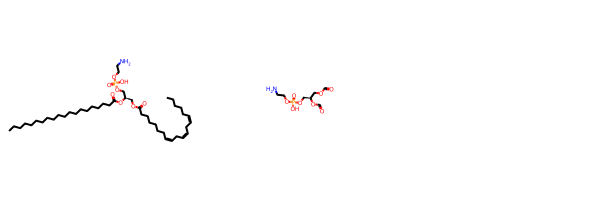

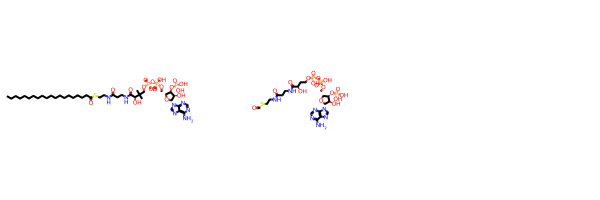

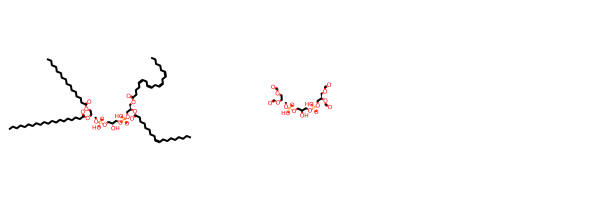

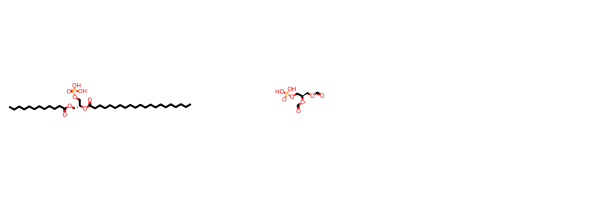

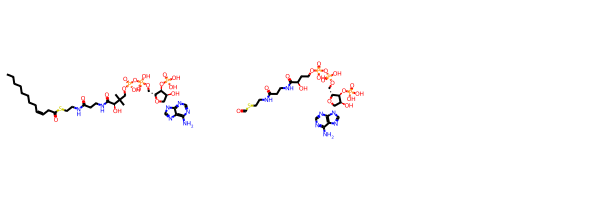

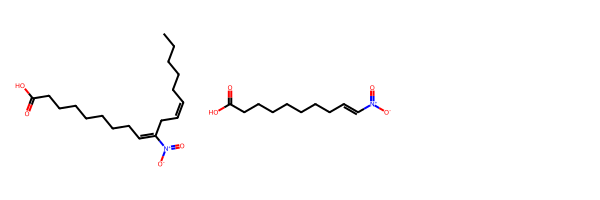

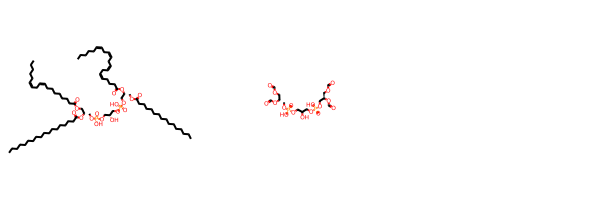

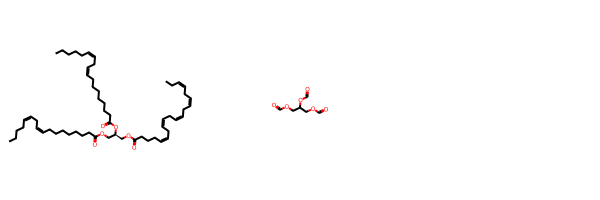

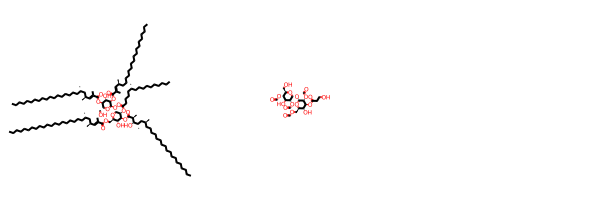

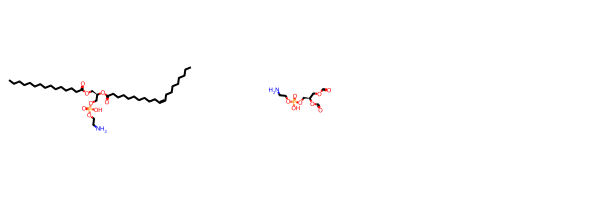

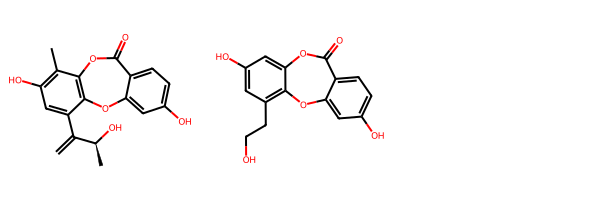

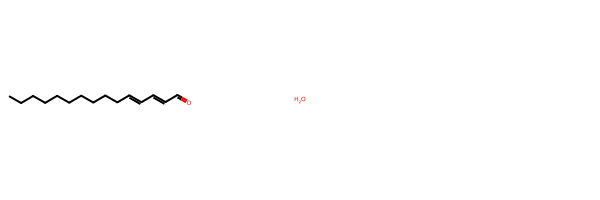

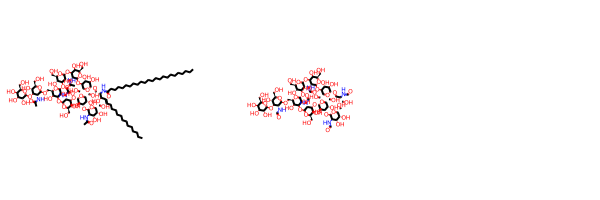

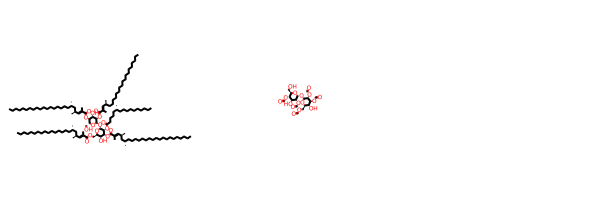

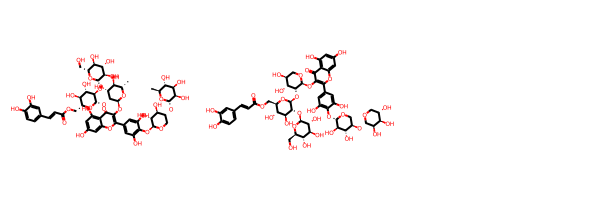

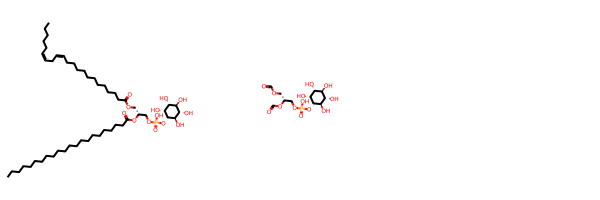

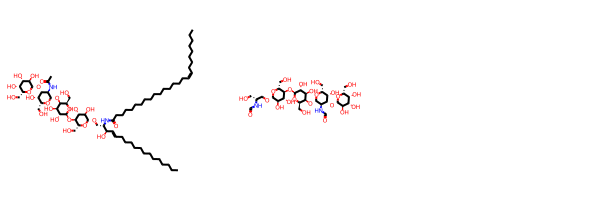

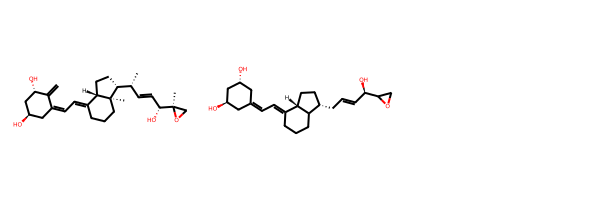

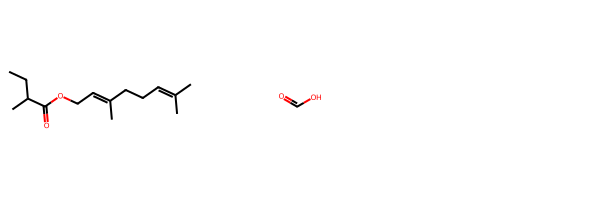

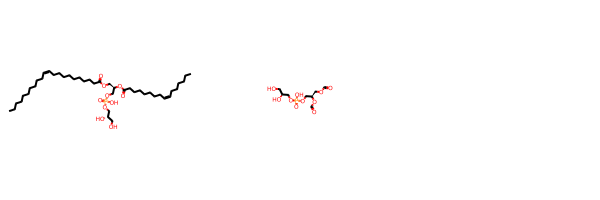

In [4]:
df = df.sample(n=20).reset_index(drop=True)
for i in range(df.shape[0]):
    lipid = df['SMILES'].iloc[i]
    head = get_head(lipid)
    display(Draw.MolsToGridImage([Chem.MolFromSmiles(lipid), Chem.MolFromSmiles(head)]))